In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


etymology = pd.read_csv('etymology.csv')
display(etymology)

,term_id,lang,term,reltype,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
0,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,group_derived_root,NaN,NaN,NaN,0,0IIU6TlkSA2D7dg1PfxGOw,NaN,NaN
1,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,borrowed_from,fhl-sdgwXaWvYD8CgaKXpQ,Latin,thēsaurus,0,NaN,0IIU6TlkSA2D7dg1PfxGOw,0.0
2,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0,NaN,0IIU6TlkSA2D7dg1PfxGOw,1.0
3,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,doublet_with,sqiifJX3XIOQ0vZ0trzRaA,English,treasure,0,NaN,NaN,NaN
4,iwDzanYmWxaUKbOlUy2yyQ,Latin,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3884332,ttDtihHdV4aL8aDWZpIgnQ,English,Boell,borrowed_from,AUIYyyL0V_2rTzbDwWeVig,Danish,Bøll,0,NaN,VfBh8FOWR_muVFpFl7EOvw,0.0
3884333,ttDtihHdV4aL8aDWZpIgnQ,English,Boell,borrowed_from,_zZUp3xTUyyi8TrPVMfOUw,German,Böll,0,NaN,VfBh8FOWR_muVFpFl7EOvw,1.0
3884334,s0ANGE2hXn6nen8AFLynOg,South Levantine Arabic,بالمية,has_affix,QLqQUWCoUu6hQGr40QVQyw,South Levantine Arabic,بـ,0,NaN,NaN,NaN
3884335,s0ANGE2hXn6nen8AFLynOg,South Levantine Arabic,بالمية,has_affix,sVDOI8DxUwq2DD03Y3HGdw,South Levantine Arabic,الميّة,1,NaN,NaN,NaN


In [2]:
etymology.columns

Index(['term_id', 'lang', 'term', 'reltype', 'related_term_id', 'related_lang',
       'related_term', 'position', 'group_tag', 'parent_tag',
       'parent_position'],
      dtype='object')

In [3]:
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
display(engl)

,term,reltype,related_lang,related_term
0,thesaurus,group_derived_root,NaN,NaN
1,thesaurus,borrowed_from,Latin,thēsaurus
2,thesaurus,derived_from,Ancient Greek,θησαυρός
3,thesaurus,doublet_with,English,treasure
5,portmanteau,has_root,Proto-Indo-European,*per- (fare)
...,...,...,...,...
3884219,Halloweek,blend_of,English,week
3884331,Boell,group_related_root,NaN,NaN
3884332,Boell,borrowed_from,Danish,Bøll
3884333,Boell,borrowed_from,German,Böll


In [4]:
engl['related_lang'].value_counts().median()
engl['reltype'].unique()

array(['group_derived_root', 'borrowed_from', 'derived_from',
       'doublet_with', 'has_root', 'group_affix_root',
       'etymologically_related_to', 'group_related_root',
       'inherited_from', 'cognate_of', 'abbreviation_of', 'clipping_of',
       'has_affix', 'is_onomatopoeic', 'compound_of',
       'has_prefix_with_root', 'has_suffix', 'has_confix', 'calque_of',
       'blend_of', 'has_prefix', 'back-formation_from',
       'learned_borrowing_from', 'unadapted_borrowing_from',
       'named_after', 'orthographic_borrowing_from', 'semantic_loan_of',
       'initialism_of', 'phono-semantic_matching_of',
       'semi_learned_borrowing_from'], dtype=object)

In [5]:
# (engl['related_lang'] != 'English')
related_counts = engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()
piechart_lst = related_counts[related_counts >= 150]
other = pd.Series({'Other': engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()[engl['related_lang'].value_counts() < 150].sum()})
piechart_series = pd.concat([piechart_lst, other])
piechart_series

French            4499
Latin             3504
Italian           2236
Spanish           2094
German            2056
Japanese          1840
Ancient Greek     1025
Arabic             758
Middle French      673
Russian            634
Polish             537
Hindi              508
Dutch              429
Sanskrit           417
Portuguese         317
Hebrew             309
New Latin          265
Late Latin         248
Swedish            220
Irish              209
Persian            196
Afrikaans          191
Yiddish            186
Medieval Latin     182
Korean             181
Greek              170
Armenian           158
Malay              155
Vietnamese         152
Other             2616
dtype: int64

<Axes: title={'center': 'Number of English Words Borrowed from Each Language'}>

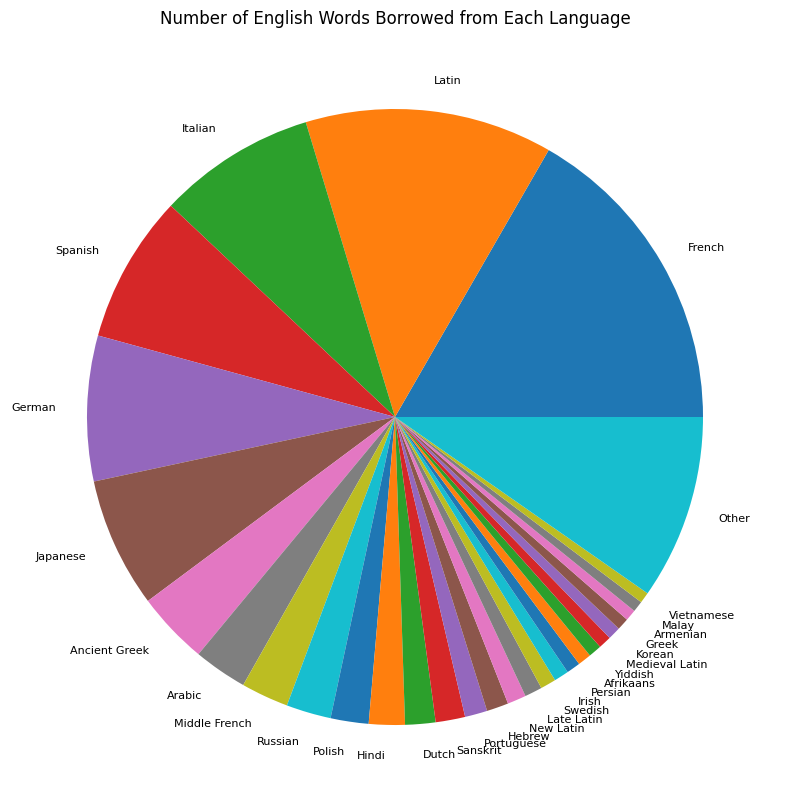

In [6]:
piechart_series.plot.pie(figsize = (10, 10), title = 'Number of English Words Borrowed from Each Language', fontsize = 8)

In [7]:
engl[engl['term'] == 'the']

,term,reltype,related_lang,related_term
4957,the,group_derived_root,NaN,NaN
4958,the,inherited_from,Middle English,the
4959,the,inherited_from,Old English,þē
4960,the,etymologically_related_to,Old English,sē
4961,the,group_related_root,NaN,NaN
4962,the,etymologically_related_to,Old English,sē
4963,the,etymologically_related_to,Old English,sēo
4964,the,etymologically_related_to,Old English,þæt
4965,the,etymologically_related_to,Old English,þā
4966,the,etymologically_related_to,Old English,sē


In [8]:
freqs = pd.read_csv('unigram_freq.csv')
freqs.set_index('word', inplace = True)
freqs

,count
word,
the,23135851162
of,13151942776
and,12997637966
to,12136980858
a,9081174698
...,...
gooek,12711
gooddg,12711
gooblle,12711


In [9]:
# engl['frequency'] = engl['term'].apply(lambda word: freqs.loc[word] if (word in freqs.index) else -1)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
df

,reltype,related_lang,related_term,count,freq
term,,,,,
the,cognate_of,West Frisian,de,2.313585e+10,3.933838e-02
the,inherited_from,Proto-Indo-European,*só,2.313585e+10,3.933838e-02
the,inherited_from,Proto-Germanic,*sa,2.313585e+10,3.933838e-02
the,cognate_of,Dutch,des te,2.313585e+10,3.933838e-02
the,etymologically_related_to,Old English,þæt,2.313585e+10,3.933838e-02
...,...,...,...,...,...
munting,has_affix,English,-ing,1.271400e+04,2.161788e-08
unswitched,has_prefix_with_root,English,switched,1.271200e+04,2.161448e-08
unswitched,has_prefix,English,un,1.271200e+04,2.161448e-08


### **Hypothesis #2**

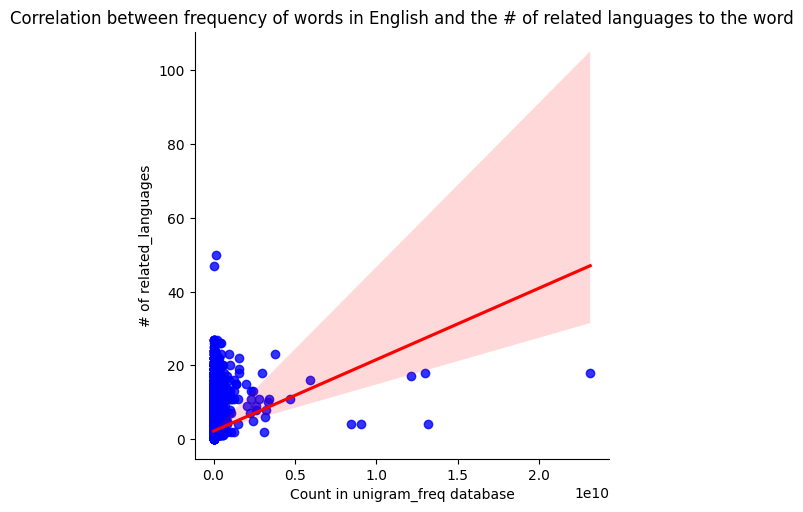

0.12038166275051536


In [11]:
#Hypothesis #2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ety_df = pd.read_csv('etymology.csv')

uni_df = pd.read_csv('unigram_freq.csv')

english_ety = ety_df[ety_df['lang'] == 'English'].groupby('term')['related_lang'].nunique()

new_df = pd.merge(uni_df, english_ety, left_on= 'word', right_on = 'term', how = 'inner')


import seaborn as sns






scatter_df = new_df[['count', 'related_lang']]

scatter_df = scatter_df.rename(columns={'count': 'x', 'related_lang': 'y'})

correlation = scatter_df['x'].corr(scatter_df['y'])

sns.lmplot(x='x', y='y', data=scatter_df, line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})

plt.xlabel('Count in unigram_freq database')
plt.ylabel('# of related_languages')
plt.title('Correlation between frequency of words in English and the # of related languages to the word')

plt.show()

print(correlation)

T-statistic: 72.69283982595081
P-value: 0.0


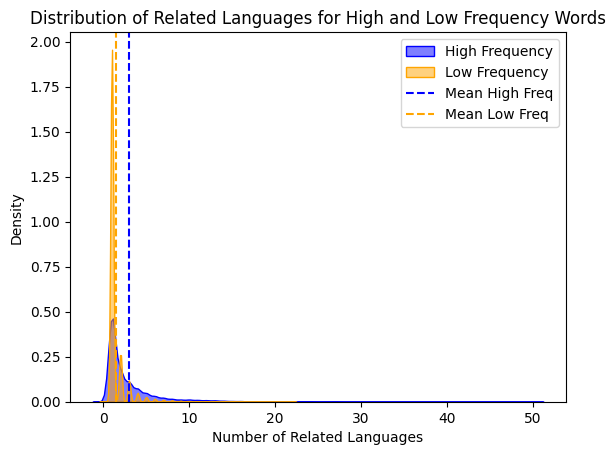

In [12]:
from scipy.stats import ttest_ind

#split the data into two groups based on the median frequency
median_freq = scatter_df['x'].median()
high_freq = scatter_df[scatter_df['x'] > median_freq]['y']
low_freq = scatter_df[scatter_df['x'] <= median_freq]['y']

t_stat, p_value = ttest_ind(high_freq, low_freq)

print(f'T-statistic: {t_stat}\nP-value: {p_value}')

sns.kdeplot(high_freq, label='High Frequency', color='blue', fill=True, alpha=0.5)
sns.kdeplot(low_freq, label='Low Frequency', color='orange', fill=True, alpha=0.5)

#Lines for means
plt.axvline(high_freq.mean(), color='blue', linestyle='--', label='Mean High Freq')
plt.axvline(low_freq.mean(), color='orange', linestyle='--', label='Mean Low Freq')

# Step 3: Customize the plot
plt.title('Distribution of Related Languages for High and Low Frequency Words')
plt.xlabel('Number of Related Languages')
plt.ylabel('Density')
plt.legend()
plt.show()

Pearson correlation: 0.2384347980116626
T-statistic: 48.0668546191621
P-value: 0.0


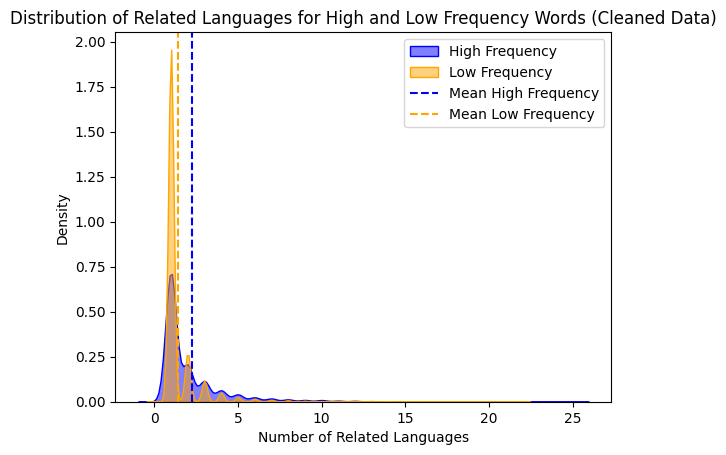

In [13]:

#Remove outliers from scatter_df
Q1 = scatter_df['x'].quantile(0.25)
Q3 = scatter_df['x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_scatter_df = scatter_df[(scatter_df['x'] >= lower_bound) & (scatter_df['x'] <= upper_bound)]

high_freq = cleaned_scatter_df[cleaned_scatter_df['x'] > median_freq]['y']
low_freq = cleaned_scatter_df[cleaned_scatter_df['x'] <= median_freq]['y']

#Print new stats
correlation = cleaned_scatter_df['x'].corr(cleaned_scatter_df['y'])
print(f'Pearson correlation: {correlation}')

t_stat, p_value = ttest_ind(high_freq, low_freq)
print(f'T-statistic: {t_stat}\nP-value: {p_value}')

#Re-visualizing the distribution plot
sns.kdeplot(high_freq, label='High Frequency', color='blue', fill=True, alpha=0.5)
sns.kdeplot(low_freq, label='Low Frequency', color='orange', fill=True, alpha=0.5)
plt.axvline(high_freq.mean(), color='blue', linestyle='--', label='Mean High Frequency')
plt.axvline(low_freq.mean(), color='orange', linestyle='--', label='Mean Low Frequency')

plt.title('Distribution of Related Languages for High and Low Frequency Words (Cleaned Data)')
plt.xlabel('Number of Related Languages')
plt.ylabel('Density')
plt.legend()
plt.show()

### **Conclusion for Hypothesis #2:**

Based on the statistical values calculated and the visuals from the graphs, it appears that there is a very small positive correlation between word frequency and amount of unique language relations a word has. The Pearson correlation coefficient is quite small, but upon decreasing extreme outliers does slightly increase, in line with this possibility.


Additionally, the P-values indicate there is no chance the differences found are coincidence. Given the high T-statistic this aligns with the idea that we should reject the null hypothesis, and determine that there is a relationship between word frequency and etymological language relations. That being said, the shapes of the distribution graphs, even after removing extreme outliers, have several modes and are high right-skewed, so this suggests further investigation is needed to determine the meaning of these statistics/conclusions.


It is likely that there is a clear positive relationship with certain commonly used parts of speech--words like "the" come to mind--which would undoubtedly have a rich etymological history.


Overall, the testing suggests a particularly significantly significant difference, the relationship is not strong, thus other factors likely are coming into play.